##TIME SERIES DATA ANALYSIS

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv("stock_data.csv")
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Name
0,NaN,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,NaN,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,NaN,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,NaN,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,NaN,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


##Visualizing Stock Prices

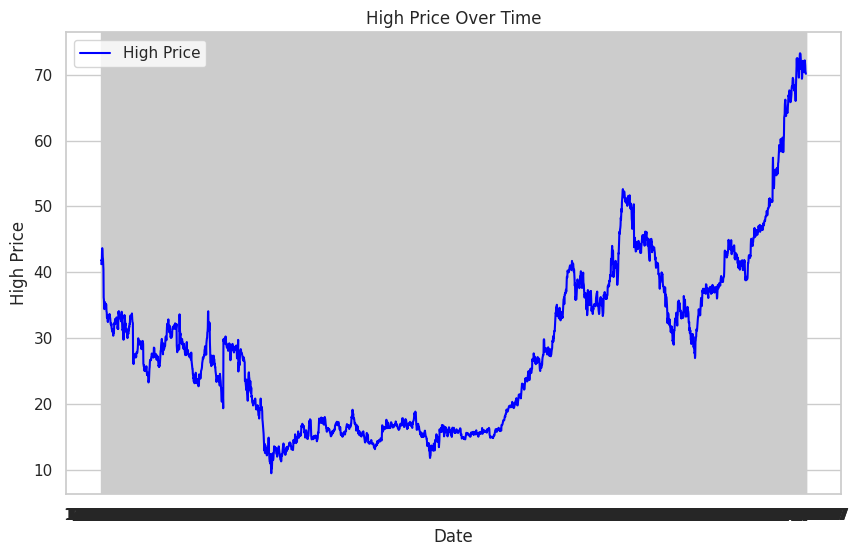

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High Price Over Time')

plt.show()

##Resampling

1st line : Resamples data to monthly frequency and calculates the mean of all numeric columns for each month.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

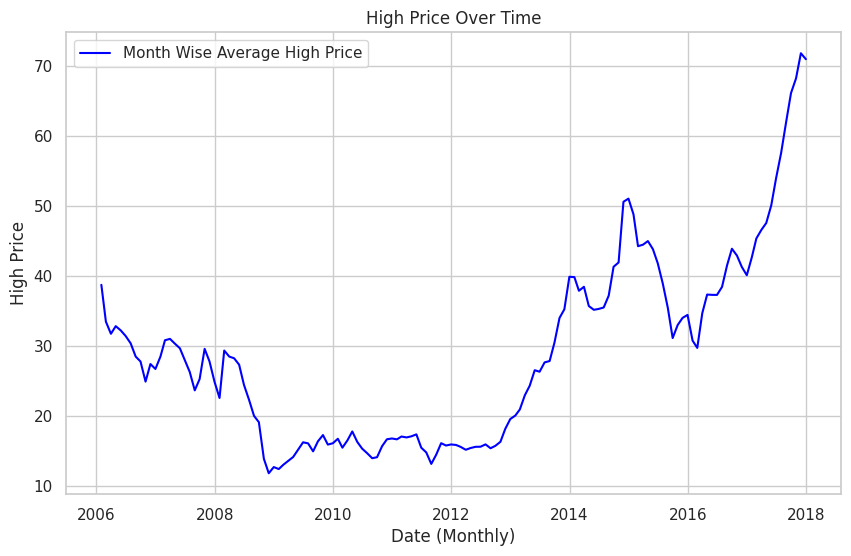

In [ ]:
df_resampled = df.resample('ME').mean(numeric_only=True)

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('High Price')
plt.title('High Price Over Time')

plt.show()

##Detecting Seasonality with Autocorrelation

<Figure size 1000x600 with 0 Axes>

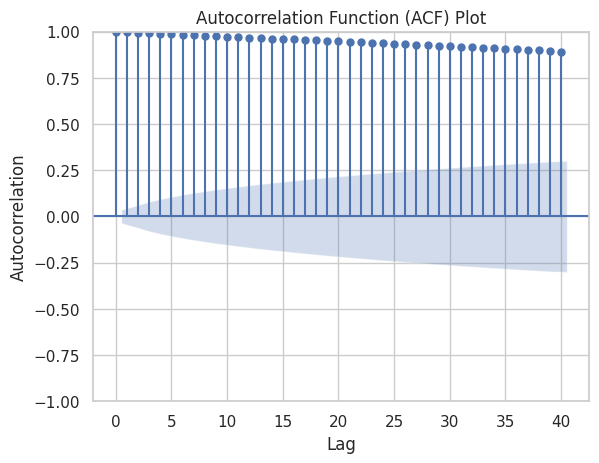

In [ ]:
plt.figure(figsize=(10,6))
plot_acf(df['High'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

##Testing Stationarity with ADF test

In [ ]:
result = adfuller(df['High'])
print('ADF STATISTIC : ', result[0])
print('p-value : ', result[1])
print('Critical values : ', result[4])

ADF STATISTIC :  0.7671404880535936
p-value :  0.9910868050318213
Critical values :  {'1%': np.float64(-3.4325316347197403), '5%': np.float64(-2.862503905260741), '10%': np.float64(-2.5672831121111113)}


##Differencing to Achieve Stationarity

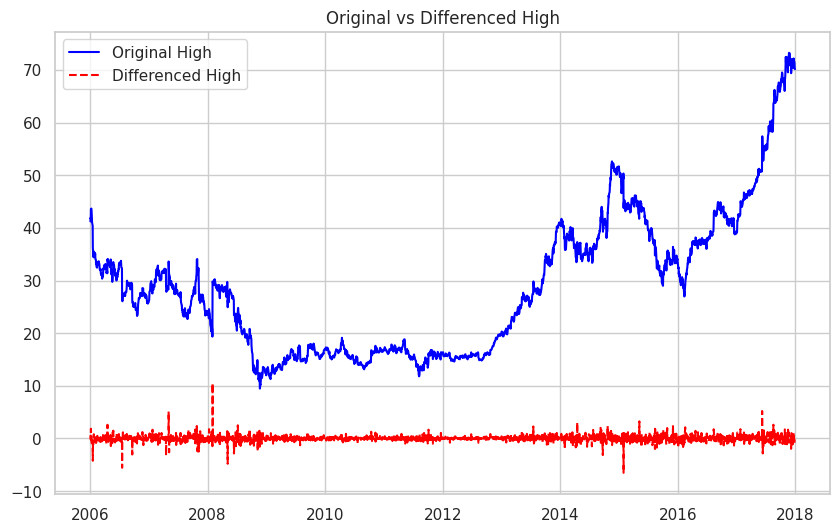

In [ ]:
df['high_diff'] = df['High'].diff()

plt.figure(figsize=(10,6))
plt.plot(df['High'], label='Original High', color='blue')

plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='red')

plt.legend()
plt.title('Original vs Differenced High')
plt.show()

# Smoothing Data with Moving Average

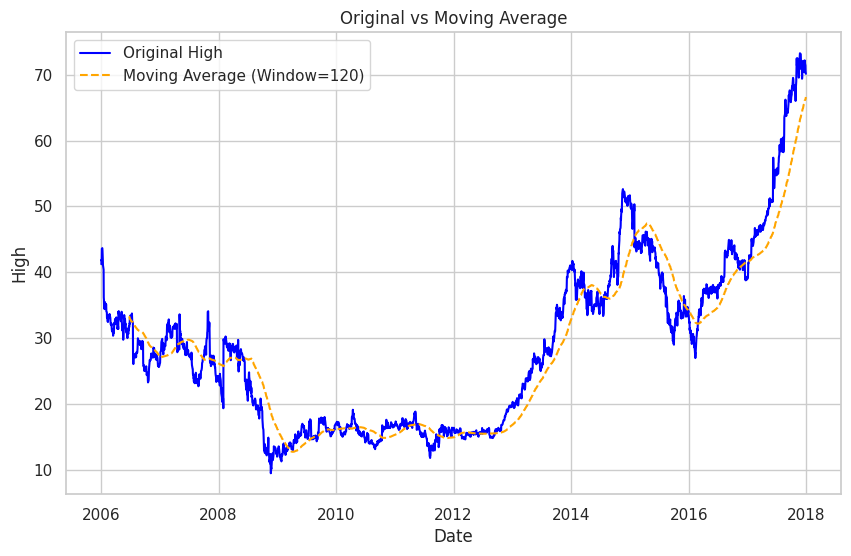

In [ ]:
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

plt.figure(figsize=(10,6))

plt.plot(df['High'], label = 'Original High', color='blue')
plt.plot(df['high_smoothed'], label = f'Moving Average (Window={window_size})',linestyle='--', color='orange')

plt.xlabel("Date")
plt.ylabel("High")
plt.title("Original vs Moving Average")
plt.legend()
plt.show()

##Original Data vs Differenced Data

In [ ]:
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

print(df_combined.head())

             High  high_diff
Date                        
2006-01-03  41.22        NaN
2006-01-04  41.90       0.68
2006-01-05  41.73      -0.17
2006-01-06  43.57       1.84
2006-01-09  43.66       0.09


In [ ]:
df.dropna(subset=['high_diff'], inplace=True)

df['high_diff'].head()

,high_diff
Date,
2006-01-04,0.68
2006-01-05,-0.17
2006-01-06,1.84
2006-01-09,0.09
2006-01-10,-0.32


ADF testing.....

In [ ]:
result = adfuller(df['high_diff'])
print('ADF statistics : ', result[0])
print('p-value : ', result[1])
print('Critical values : ', result[4])

ADF statistics :  -12.14836747834324
p-value :  1.5912766134149499e-22
Critical values :  {'1%': np.float64(-3.4325316347197403), '5%': np.float64(-2.862503905260741), '10%': np.float64(-2.5672831121111113)}


##Based on the ADF statistic we reject the null hypothesis and conclude that we have enough evidence to reject the null hypothesis